# Implementing MLPs from scratch

In this lab we will implement multilayer perceptrons (MLPs) from scratch, writing code for both forward and backward passes and analyzing their performance on an image classification task.

**Disclaimer:** This notebook is divided in two parts. Due to its length, we will use two days to finish this lab. Try to finish one part per day, but take it easy!

**Notation:**

* **Superscript $[l]$** denotes a quantity associated with the $l^{th}$ layer.

 * Example: $a^{[L]}$ is the $L^{th}$ layer activation. $W^{[L]}$ and $b^{[L]}$ are the $L^{th}$ layer parameters.

* **Superscript $(i)$** denotes a quantity associated with the $i^{th}$ example.

 * Example: $x^{(i)}$ is the $i^{th}$ training example.

* **Lowerscript $i$** denotes the $i^{th}$ entry of a vector.

 * Example: $a^{[l]}_{i}$ denotes the $i^{th}$ entry of the $l^{th}$ layer's activations.

Let's get started!

## Packages

We will use the following packages:


In [1]:
### Package imports

# Math
import numpy as np
import sklearn
import sklearn.linear_model

# Visualization
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Data loading
import h5py

%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

We will also load some helper functions that will be needed to properly use this notebook (loading datasets, visualizing some graphics...). We will download the Python files containing those functions to Google Colab and import them.

In [2]:
!wget -O mlnn_lab3.zip https://ehubox.ehu.eus/s/EH9sJbCYDt68ZRX/download
!unzip mlnn_lab3.zip
!ls

--2022-12-27 12:11:13--  https://ehubox.ehu.eus/s/EH9sJbCYDt68ZRX/download
Resolving ehubox.ehu.eus (ehubox.ehu.eus)... 158.227.0.95
Connecting to ehubox.ehu.eus (ehubox.ehu.eus)|158.227.0.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2793849 (2.7M) [application/zip]
Saving to: ‘mlnn_lab3.zip’

mlnn_lab3.zip       100%[===================>]   2.66M   172KB/s    in 14s     

2022-12-27 12:11:29 (188 KB/s) - ‘mlnn_lab3.zip’ saved [2793849/2793849]

Archive:  mlnn_lab3.zip
   creating: mlnn_lab3/
  inflating: mlnn_lab3/plots.py      
  inflating: mlnn_lab3/test_catvnoncat.h5  
  inflating: mlnn_lab3/train_catvnoncat.h5  
  inflating: mlnn_lab3/test_cases.py  
  inflating: mlnn_lab3/datasets.py   
  inflating: mlnn_lab3/models.py     
mlnn_lab3  mlnn_lab3.zip  sample_data


In [3]:
import sys
sys.path.append('/content/mlnn_lab3')

In [4]:
from datasets import *
from models import *
from plots import *
from test_cases import *

# PART 1: Architecture of an MLP

To build your neural network, you will be implementing several "helper functions". These helper functions will be used in the second part of this lab to build an $L$-layer neural network. Each small helper function you will implement will have detailed instructions that will walk you through the necessary steps. Here is an outline of this lab. You will:

    
*   Initialize the parameters for an L-layer neural network.

*   Implement the forward propagation module (shown in purple in the figure below). 
    *    Complete the LINEAR part of a layer's forward propagation step (resulting in $Z^{[l]}$).
    *    Take an ACTIVATION function (relu/sigmoid) and combine it into a new [LINEAR->ACTIVATION] forward function.
    *    Stack the [LINEAR->RELU] forward function $L-1$ times (for layers 1 through $L-1$) and add a [LINEAR->SIGMOID] at the end (for the final layer $L$). This gives you a new `L_model_forward function`.

*   Compute the loss using cross-entropy.

*   Implement the backward propagation module (denoted in red in the figure below).
    *    Complete the LINEAR part of a layer's backward propagation step.
    *    We give you the gradient of the ACTIVATE function (relu_backward/sigmoid_backward).
    *    Combine the previous two steps into a new [LINEAR->ACTIVATION] backward function.
    *    Stack [LINEAR->RELU] backward L-1 times and add [LINEAR->SIGMOID] backward in a new `L_model_backward function`.

*   Finally, implement the function that updates its learnable parameters.

![picture](https://drive.google.com/uc?export=view&id=1UPESxZ0GjeRHnHLVNqIYrVoxATGWTlq-)

**Note** that for every forward function, there is a corresponding backward function. That is why at every step of your forward module you will be storing some values in a cache. The cached values are useful for computing gradients. In the backpropagation module you will then use the cache to calculate the gradients. This lab will show you exactly how to carry out each of these steps.

## Initializing parameters

In the following function we will initialize all the learnable parameters of our neural network. This includes weights `W` and biases `b`. Our code will be scalable to MLPs of `L` layers, so the code snippet that you need to write is inside a loop.

**EXERCISE**: Implement `initialize_parameters(layer_dims)`, the function that initializes learnable parameters of an $L$-layer MLP.

* Use [Xavier initialization](https://prateekvishnu.medium.com/xavier-and-he-normal-he-et-al-initialization-8e3d7a087528) for the weight matrices `W1`, `W2`,... (**NOTE:** We will see initialization approaches in the next course topic, but just follow the instructions for now).
* Use zeros initialization for the bias vectors `b1`, `b2`,... . `np.zeros(shape)` will do the trick.
* We will store the number of units in each layer in a list called `layer_dims`. 
    * Take, for example, `layer_dims = [2, 4, 1]`. There are two inputs, one hidden layer with 4 hidden units, and an output layer with 1 output unit. This means `W1`'s shape is `(4, 2)`, `b1` is `(4,1)`, `W2` is `(1, 4)` and `b2` is `(1,1)`. 
* As an example, for a neural network with only one layer `L = 1`, this would be the code:

```
if L == 1:
      parameters["W1"] = np.random.randn(layer_dims[1], layer_dims[0]) * np.sqrt(1 / layer_dims[0])
      parameters["b1"] = np.zeros((layer_dims[1], 1))
```


In [ ]:
def initialize_parameters(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims) # number of layers in the network

    for l in range(1, L):
        ### START CODE HERE ### (≈ 2 lines)
        parameters["W"+str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(1/layer_dims[l-1]) 
        parameters["b"+str(l)] = np.zeros((layer_dims[l],1))
        ### END CODE HERE ###
 
    return parameters

In [ ]:
layer_dims = [5, 4, 3]
parameters = initialize_parameters(layer_dims)

print(f"W1 has shape {parameters['W1'].shape}:\n {str(parameters['W1'])}")
print(f"b1 has shape {parameters['b1'].shape}:\n {str(parameters['b1'])}")
print(f"W2 has shape {parameters['W2'].shape}:\n {str(parameters['W2'])}")
print(f"b2 has shape {parameters['b2'].shape}:\n {str(parameters['b2'])}")

W1 has shape (4, 5):
 [[ 0.79989897  0.19521314  0.04315498 -0.83337927 -0.12405178]
 [-0.15865304 -0.03700312 -0.28040323 -0.01959608 -0.21341839]
 [-0.58757818  0.39561516  0.39413741  0.76454432  0.02237573]
 [-0.18097724 -0.24389238 -0.69160568  0.43932807 -0.49241241]]
b1 has shape (4, 1):
 [[0.]
 [0.]
 [0.]
 [0.]]
W2 has shape (3, 4):
 [[-0.59252326 -0.10282495  0.74307418  0.11835813]
 [-0.51189257 -0.3564966   0.31262248 -0.08025668]
 [-0.38441818 -0.11501536  0.37252813  0.98805539]]
b2 has shape (3, 1):
 [[0.]
 [0.]
 [0.]]


**EXPECTED OUTPUT**:

`W1` has shape (4, 5):
 ```
 [[0.79989897  0.19521314  0.04315498 -0.83337927 -0.12405178]
 [-0.15865304 -0.03700312 -0.28040323 -0.01959608 -0.21341839]
 [-0.58757818  0.39561516  0.39413741  0.76454432  0.02237573]
 [-0.18097724 -0.24389238 -0.69160568  0.43932807 -0.49241241]]
 ```
`W2` has shape (3, 4):
 ```
 [[-0.59252326 -0.10282495  0.74307418  0.11835813]
 [-0.51189257 -0.3564966   0.31262248 -0.08025668]
 [-0.38441818 -0.11501536  0.37252813  0.98805539]]
 ```

`b1` has shape (4, 1) filled with zeros.

`b2` has shape (3, 1) filled with zeros.

## Forward propagation

Now that you have initialized your parameters, you will do the forward propagation module. You will start by implementing some basic functions that you will use later when implementing the model. You will complete three functions in this order:

* LINEAR
* LINEAR -> ACTIVATION where ACTIVATION will be either ReLU or Sigmoid.
* [LINEAR -> RELU] × (L-1) -> LINEAR -> SIGMOID (whole model)

### Linear module

The linear forward module (vectorized over all the examples) computes the following equations:

$$Z^{[l]} = W^{[l]} A^{[l - 1]} + b^{[l]}$$

where $A^{[0]} = X$.

**EXERCISE**: Build the linear part of forward propagation.


In [ ]:
def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python tuple containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    ### START CODE HERE ### (≈ 1 line)
    #Z = np.matmul(W, A) + b
    Z = np.dot(W, A) +b
    ### END CODE HERE ###
    
    assert Z.shape == (W.shape[0], A.shape[1])
    cache = (A, W, b)
    
    return Z, cache

In [ ]:
A, W, b = linear_forward_test_case()

Z, linear_cache = linear_forward(A, W, b)
print("Z = " + str(Z))

Z = [[ 3.26295337 -1.23429987]]


**EXPECTED OUTPUT**: `Z = [[ 3.26295337 -1.23429987]]`

### Activation functions

In this notebook, you will use two activation functions. Thankfully, the code for both forward and backward propagation of these functions are already given. 

*   **`sigmoid(z)`**: $$\sigma(Z) =  \frac{1}{1 + e^{-Z}} = \frac{1}{1 + e^{-(W A + b)}}$$

*   **`relu(z)`**: $$\mathrm{RELU}(Z) =  max(0, Z) = max(0, W A + b)$$

**TODO**: Those functions return a tuple of two elements: the result and $z$ (to be stored in the cache).

### Linear + Activation

For our convenience, we are going to group two functions (Linear and Activation) into one function (LINEAR->ACTIVATION). Hence, you will implement a function that does the LINEAR forward step followed by an ACTIVATION forward step.

**EXERCISE**: Implement the forward propagation of the LINEAR->ACTIVATION layer, that is:
 
 $$A^{[l]}=g(Z^{[l]})=g(W^{[l]} A^{[l−1]}+b^{[l]})$$

where the activation "g" can be `sigmoid()` or `relu()`. Use `linear_forward()` and the correct activation function.

In [ ]:
def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python tuple containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines)
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
        ### END CODE HERE ###
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines)
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
        ### END CODE HERE ###
    
    assert A.shape == (W.shape[0], A_prev.shape[1])
    cache = (linear_cache, activation_cache)

    return A, cache

In [ ]:
A_prev, W, b = linear_activation_forward_test_case()

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "sigmoid")
print("With sigmoid: A = " + str(A))

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "relu")
print("With ReLU: A = " + str(A))

With sigmoid: A = [[0.96890023 0.11013289]]
With ReLU: A = [[3.43896131 0.        ]]


**EXPECTED OUTPUT**:

    With sigmoid: A = [[0.96890023 0.11013289]]
    With ReLU: A = [[3.43896131 0.        ]]

**Note**: In deep learning, the "[LINEAR->ACTIVATION]" computation is counted as a single layer in the neural network, not two layers.

### L-layer module

For even more convenience when implementing the $L$-layer Neural Network, you will need a function that replicates the previous module (`linear_activation_forward` with RELU) L−1 times followed by a `linear_activation_forward` with SIGMOID module.

    [LINEAR -> RELU] × (L-1) -> [LINEAR -> SIGMOID]

**EXERCISE**: Implement the forward propagation of the above model.

**Note**: In the code below, the variable `AL` will denote $A^{[L]}=\sigma(Z^{[L]})=\sigma(W^{[L]}A^{[L-1]}+b^{[L]})$.

In [ ]:
def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_activation_forward() (there are L-1 of them, indexed from 0 to L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2  # number of layers in the neural network
  
    # Implement [LINEAR -> RELU] * (L-1) and add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        ### START CODE HERE ### (≈ 2 lines)
        A , cache = linear_activation_forward(A_prev, parameters["W"+str(l)], parameters["b"+str(l)], "relu")
        caches.append(cache)
        ### END CODE HERE ###
    
    # Implement LINEAR -> SIGMOID and add "cache" to the "caches" list.
    ### START CODE HERE ### (≈ 2 lines)
    AL, cache = linear_activation_forward(A, parameters["W"+str(L)], parameters["b"+str(L)], "sigmoid")
    caches.append(cache)
    ### END CODE HERE ###
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

In [ ]:
X, parameters = L_model_forward_test_case_2hidden()

AL, caches = L_model_forward(X, parameters)
print("AL[:5] = " + str(AL[0, :5]))
print("Length of caches list = " + str(len(caches)))

AL[:5] = [0.03921668 0.70498921 0.19734387 0.04728177]
Length of caches list = 3


**EXPECTED OUTPUT**:

    AL[:5] = [[ 0.03921668 0.70498921 0.19734387 0.04728177]]
    Length of caches list = 3

Great! Now you have a full forward propagation that takes the input $X$ and outputs a row vector $A^{[L]}$ containing your predictions. It also stores all intermediate values in "caches". Using $A^{[L]}$, you can compute the cost of your predictions.

## Cost function

Before implementing backward propagation, let's focus on computing the cost function which will allow us to check if the model is actually learning.

**EXERCISE**: Compute the cross-entropy cost $J$, using the following formula: $$J = -\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right)) $$

In [ ]:
def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    m = Y.shape[1]

    # Compute cost from aL and y.
    ### START CODE HERE ### (≈ 2 lines)
    cost = np.sum((Y * np.log(AL)) + ((1-Y) * np.log(1-AL)))
    cost = -(cost/m)
    ### END CODE HERE ###
    
    cost = np.squeeze(cost)  # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert cost.shape == ()
    
    return cost

In [ ]:
AL_example = np.array([[0.9, 0.4, 0.3]])
Y_example = np.array([[1.0, 0.0, 1.0]])

print("cost = " + str(compute_cost(AL_example, Y_example)))

cost = 0.6067196479165844


**EXPECTED OUTPUT**: `cost = 0.6067196479165844`.

## Backward propagation

Just like with forward propagation, you will implement helper functions for backpropagation. Remember that back propagation is used to calculate the gradient of the loss function with respect to the parameters.

![picture](https://drive.google.com/uc?export=view&id=1Nkwe4tQB4_ZPPk2ljevoSP8aSc40tg0l)

The image above is an example of Forward and Backward propagation for *LINEAR->RELU->LINEAR->SIGMOID*. The purple blocks represent the forward propagation, and the red blocks represent the backward propagation.

Now, similar to forward propagation, you are going to build the backward propagation in three steps:

* LINEAR backward
* LINEAR -> ACTIVATION backward where ACTIVATION will be the derivative of either ReLU or Sigmoid.
* [LINEAR -> RELU] × (L-1) -> LINEAR -> SIGMOID backward (whole model)

### Linear module

For layer $l$, the linear part is: $Z^{[l]}=W^{[l]}A^{[l-1]}+b^{[l]}$ (followed by an activation).

Suppose you have already calculated the derivative $dZ^{[l]}=\frac{∂L}{∂Z^{[l]}}$. You want to get $(dW^{[l]}, db^{[l]}, dA^{[l-1]})$.

![picture](https://drive.google.com/uc?export=view&id=1OrH23nek89FnbH8wGGMlrIXQkG6asvaq)





The three outputs $(dW^{[l]},db^{[l]},dA^{[l-1]})$ are computed using the input $dZ^{[l]}$. Here are the formulas you need:

$$dW^{[l]}=\frac{∂J}{∂W^{[l]}}=\frac{1}{m}dZ^{[l]}A^{[l-1]T}$$

$$db^{[l]}=\frac{∂J}{∂b^{[l]}}=\frac{1}{m}\sum_{i=1}^{m}dZ^{[l](i)}$$

$$dA^{[l−1]}=\frac{∂L}{∂A^{[l−1]}}=W^{[l]T}dZ^{[l]}$$

**EXERCISE**: Use the 3 formulas above to implement `linear_backward()`.

In [ ]:
def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]
    
    ### START CODE HERE ### (≈ 3 lines)
    dW = (1/m)*(np.dot(dZ, A_prev.T))
    db = (1/m)*(np.sum(dZ, axis=1, keepdims=True))
    #dA_prev = np.matmul(W.T, dZ)
    dA_prev = np.dot(W.T, dZ)
    ### END CODE HERE ###
    
    assert dA_prev.shape == A_prev.shape
    assert dW.shape == W.shape
    assert db.shape == b.shape
    
    return dA_prev, dW, db

In [ ]:
# Set up some test inputs
dZ, linear_cache = linear_backward_test_case()

dA_prev, dW, db = linear_backward(dZ, linear_cache)
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

dA_prev = [[-1.15171336  0.06718465 -0.3204696   2.09812712]
 [ 0.60345879 -3.72508701  5.81700741 -3.84326836]
 [-0.4319552  -1.30987417  1.72354705  0.05070578]
 [-0.38981415  0.60811244 -1.25938424  1.47191593]
 [-2.52214926  2.67882552 -0.67947465  1.48119548]]
dW = [[ 0.07313866 -0.0976715  -0.87585828  0.73763362  0.00785716]
 [ 0.85508818  0.37530413 -0.59912655  0.71278189 -0.58931808]
 [ 0.97913304 -0.24376494 -0.08839671  0.55151192 -0.10290907]]
db = [[-0.14713786]
 [-0.11313155]
 [-0.13209101]]


**EXPECTED OUTPUT**:
```
dA_prev = [[-1.15171336  0.06718465 -0.3204696   2.09812712]
 [ 0.60345879 -3.72508701  5.81700741 -3.84326836]
 [-0.4319552  -1.30987417  1.72354705  0.05070578]
 [-0.38981415  0.60811244 -1.25938424  1.47191593]
 [-2.52214926  2.67882552 -0.67947465  1.48119548]]
dW = [[ 0.07313866 -0.0976715  -0.87585828  0.73763362  0.00785716]
 [ 0.85508818  0.37530413 -0.59912655  0.71278189 -0.58931808]
 [ 0.97913304 -0.24376494 -0.08839671  0.55151192 -0.10290907]]
db = [[-0.14713786]
 [-0.11313155]
 [-0.13209101]]
```

### Linear + Activation

**EXERCISE**: Use `linear_backward()` to implement `linear_activation_backward()`. 

Functions `relu_backward()` and `sigmoid_backward()` are already implemented and they take two parameters as input: $dA^{[l]}$ and `activation_cache` (returned by `relu()` and `sigmoid()` functions).

In [ ]:
def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        ### START CODE HERE ### (≈ 2 lines)
        dZ = relu_backward(dA , activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        ### END CODE HERE ###
        
    elif activation == "sigmoid":
        ### START CODE HERE ### (≈ 2 lines)
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        ### END CODE HERE ###

    
    return dA_prev, dW, db

In [ ]:
dAL, linear_activation_cache = linear_activation_backward_test_case()

dA_prev, dW, db = linear_activation_backward(dAL, linear_activation_cache, activation = "sigmoid")
print ("sigmoid:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db) + "\n")

dA_prev, dW, db = linear_activation_backward(dAL, linear_activation_cache, activation = "relu")
print ("relu:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))


sigmoid:
dA_prev = [[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]]
dW = [[ 0.10266786  0.09778551 -0.01968084]]
db = [[-0.05729622]]

relu:
dA_prev = [[ 0.44090989  0.        ]
 [ 0.37883606  0.        ]
 [-0.2298228   0.        ]]
dW = [[ 0.44513824  0.37371418 -0.10478989]]
db = [[-0.20837892]]


**EXPECTED OUTPUT**:

With Sigmoid:
```
dA_prev = [[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]]
dW = [[ 0.10266786  0.09778551 -0.01968084]]
db = [[-0.05729622]]
```
With ReLU:
```
dA_prev = [[ 0.44090989 -0.        ]
 [ 0.37883606 -0.        ]
 [-0.2298228   0.        ]]
dW = [[ 0.44513824  0.37371418 -0.10478989]]
db = [[-0.20837892]]
```



### L-layer module

Now you will implement the backward function for the whole network. Recall that when you implemented the `L_model_forward` function, at each iteration, you stored a cache which contains (`X`, `W`, `b` and `z`). In the back propagation module, you will use those variables to compute the gradients. Therefore, in the `L_model_backward` function, you will iterate through all the hidden layers backward, starting from layer L. On each step, you will use the cached values for layer $l$ to backpropagate through layer $l$.

**Initializing backpropagation**: To backpropagate through this network, we know that the output is $A^{[L]}=\sigma(Z^{[L]})$. Your code thus needs to compute $dA^{[L]} =\frac{∂L}{∂A^{[L]}}$

 - To do so, use this formula (derived using calculus which you don't need in-depth knowledge of):

```
dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL)) # derivative of cost with respect to AL
```

You can then use this post-activation gradient `dAL` to keep going backward. You can now feed in `dAL` into the LINEAR->SIGMOID backward function you implemented (which will use the cached values stored by the `L_model_forward function`). After that, you will have to use a for loop to iterate through all the other layers using the LINEAR->RELU backward function. You should store each `dA`, `dW`, and `db` in the grads dictionary. To do so, use this formula:

```
grads["dW"+str(l)]=dW[l]
```

For example, for $l=3$ this would store ```grads["dW3"] = dW[3]```


**EXERCISE**: Implement backpropagation for the [LINEAR->RELU] ×
(L-1) -> LINEAR -> SIGMOID model.

In [ ]:
def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation (initialize dAL)
    ### START CODE HERE ### (≈ 1 line)
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL)) # derivative of cost with respect to AL
    ### END CODE HERE ###
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
    ### START CODE HERE ### (≈ 2 lines)
    current_cache = caches[L-1]
    grads["dA" +str(L-1)], grads["dW" +str(L)], grads["db"+str(L)] = linear_activation_backward(dAL, current_cache, "sigmoid")
    ### END CODE HERE ###
    
    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        ### START CODE HERE ### (≈ 5 lines)
        current_cache = caches[l]
        grads["dA" + str(l)], grads["dW" + str(l + 1)], grads["db" + str(l + 1)] = linear_activation_backward(grads["dA"+str(l+1)], current_cache, "relu")
        #grads["dW" + str(l)]=dW[l]
        ### END CODE HERE ###

    return grads

In [ ]:
AL, Y_assess, caches = L_model_backward_test_case()
grads = L_model_backward(AL, Y_assess, caches)
print_grads(grads)

dW1 = [[0.41010002 0.07807203 0.13798444 0.10502167]
 [0.         0.         0.         0.        ]
 [0.05283652 0.01005865 0.01777766 0.0135308 ]]
db1 = [[-0.22007063]
 [ 0.        ]
 [-0.02835349]]
dA1 = [[ 0.12913162 -0.44014127]
 [-0.14175655  0.48317296]
 [ 0.01663708 -0.05670698]]


**EXPECTED OUTPUT**:
```
dW1 = [[ 0.41010002  0.07807203  0.13798444  0.10502167]
 [ 0.          0.          0.          0.        ]
 [ 0.05283652  0.01005865  0.01777766  0.0135308 ]]
db1 = [[-0.22007063]
 [ 0.        ]
 [-0.02835349]]
dA1 = [[ 0.12913162 -0.44014127]
 [-0.14175655  0.48317296]
 [ 0.01663708 -0.05670698]]
 ```

## Updating Parameters

In this section you will update the parameters of the model, using gradient descent:

$$W^{[l]}=W^{[l]} − \alpha \hspace{0.1cm} dW^{[l]}$$
$$b^{[l]}=b^{[l]} − \alpha \hspace{0.1cm} db^{[l]}$$

where $\alpha$ is the learning rate. After computing the updated parameters, you will need to store them in the parameters dictionary.

**EXERCISE**: Implement `update_parameters()` to update your parameters using gradient descent.

**Instructions**: Update parameters using gradient descent on every `W[l]` and `b[l]` for $l=1,2,\ldots,L$.

In [ ]:
def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    ### START CODE HERE ### (≈ 2 lines)
    for l in range(0,L):
      parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
      parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
    ### END CODE HERE ###
    return parameters

In [ ]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads, 0.1)

print ("W1 = "+ str(parameters["W1"]))
print ("b1 = "+ str(parameters["b1"]))
print ("W2 = "+ str(parameters["W2"]))
print ("b2 = "+ str(parameters["b2"]))

W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]]
b1 = [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]]
W2 = [[-0.55569196  0.0354055   1.32964895]]
b2 = [[-0.84610769]]


**EXPECTED OUTPUT**:
```
W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]]
b1 = [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]]
W2 = [[-0.55569196  0.0354055   1.32964895]]
b2 = [[-0.84610769]]
 ```

And with this, you have finished the first part of this notebook. Congratulations!

# PART 2: Training MLPs on different tasks

You will use the functions you implemented in Part 1 to build a deep network, and apply it to two different classification tasks.

## Training Process

**EXERCISE**: Use the helper functions you have implemented previously to build an L-layer neural network with the following structure: [LINEAR -> RELU]×(L-1) -> LINEAR -> SIGMOID. The functions you may need and their inputs are:

```
def initialize_parameters(layer_dims):
    ...
    return parameters 

def L_model_forward(X, parameters):
    ...
    return AL, caches

def compute_cost(AL, Y):
    ...
    return cost

def L_model_backward(AL, Y, caches):
    ...
    return grads
    
def update_parameters(parameters, grads, learning_rate):
    ...
    return parameters
```

In [ ]:
def L_layer_model(X, Y, layer_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False, visualize=False):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (dim, number of examples)
    Y -- true "label" vector (containing 0 or 1), of shape (1, number of examples)
    layer_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps and makes a plot with those values at the end
    visualize -- if True, it shows predictions of the model in different epochs
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1) # for reproducibility
    costs = [] # keep track of cost

    if visualize:
        fig = create_heatmap()
        epf = num_iterations // 50 # epochs per frame in interactive plot

    # Gradient descent (≈ 1 lines)
    ### START CODE HERE ###
    parameters = initialize_parameters(layer_dims)
    ### END CODE HERE ###

    for i in range(0, num_iterations):
        # Gradient descent, save costs when needed! (≈ 4 lines)
        ### START CODE HERE ###
        AL, cache = L_model_forward(X, parameters)
        cost = compute_cost(AL, Y)
        grads = L_model_backward(AL, Y, cache)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###

        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            costs.append(cost)

        if visualize and i % epf == 0:
            fig = add_heatmap(fig, parameters, L_model_forward, i)
     
    # Plot the cost
    if print_cost:
        plt.plot(np.squeeze(costs), color="red", label="train")
        plt.ylabel('cost')
        plt.xlabel('iterations (per hundreds)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.legend()
        plt.show()

    if visualize:
        fig = show_heatmap(fig, X, Y, num_iterations, epf)
        return parameters, fig
    else:
        return parameters

Cost after iteration 0: 0.829357
Cost after iteration 100: 0.737303
Cost after iteration 200: 0.699812
Cost after iteration 300: 0.684013
Cost after iteration 400: 0.676428
Cost after iteration 500: 0.672393
Cost after iteration 600: 0.670016
Cost after iteration 700: 0.668464
Cost after iteration 800: 0.667248
Cost after iteration 900: 0.666211
Cost after iteration 1000: 0.665305
Cost after iteration 1100: 0.664463
Cost after iteration 1200: 0.663691
Cost after iteration 1300: 0.662949
Cost after iteration 1400: 0.662255
Cost after iteration 1500: 0.661585
Cost after iteration 1600: 0.660957
Cost after iteration 1700: 0.660356
Cost after iteration 1800: 0.659778
Cost after iteration 1900: 0.659214
Cost after iteration 2000: 0.658668
Cost after iteration 2100: 0.658128
Cost after iteration 2200: 0.657584
Cost after iteration 2300: 0.657039
Cost after iteration 2400: 0.656499
Cost after iteration 2500: 0.655963
Cost after iteration 2600: 0.655431
Cost after iteration 2700: 0.654897
Cost

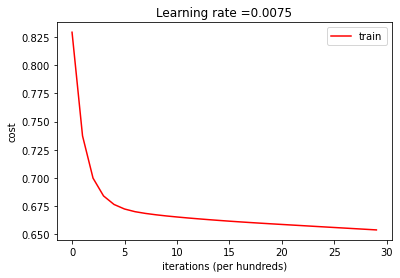

In [ ]:
# load some data and train a model
X, Y = load_planar_dataset() 
L_layer_model(X, Y, layer_dims=[2, 5, 1], learning_rate = 0.0075, num_iterations = 3000, print_cost=True);

**EXPECTED OUTPUT**:
```
Cost after iteration 0: 0.829357
Cost after iteration 100: 0.737303
...
Cost after iteration 2900: 0.653821
```

## Flower Dataset

First, let's get the dataset you will work on. The following function creates a "flower" 2-class dataset into variables `X` (which contains instances) and `Y` (which contains labels).

In [ ]:
X, Y = load_planar_dataset()

Let's see what shape has this new dataset!

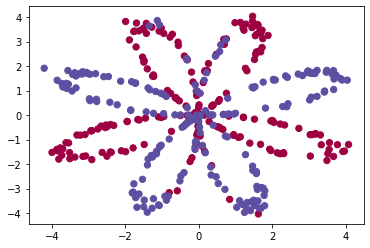

In [ ]:
# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

**EXERCISE:** Using Numpy, print the shape of variables `X` and `Y`. How many training examples `m` do we have?

In [ ]:
### START CODE HERE ### (≈ 3 lines)
shape_X = np.shape(X)
shape_Y = np.shape(Y)
m = shape_Y[1]
### END CODE HERE ###

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have m = 400 training examples!


### Motivation: Logistic Regression

Before training a full neural network, let's first see how logistic regression performs on this problem. You can use sklearn's built-in functions to do that. Run the code below to train a logistic regression classifier on the dataset.

In [ ]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, np.squeeze(Y));



You can now plot the decision boundary of these models. Run the code below.

Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


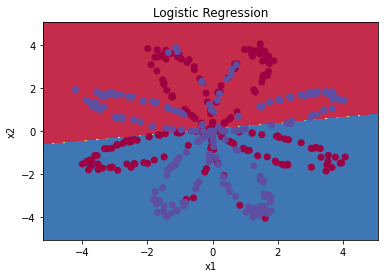

In [ ]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

**Interpretation**: The dataset is not linearly separable, so logistic regression doesn't perform well. Hopefully a neural network will do better. Let's try this now!

### Visualizing training

We will use this dataset to show:

1. The improvement in accuracy that a multilayer perceptron gives us compared to the previous logistic regression.
2. To show what the model learns and how hyperparameters (and the model's size) affects training.

In order to do that, we will train a model and show in an interactive manner what is the model predicting in a given iteration of the training process.

**EXERCISE**: Try changing the number of layers and their size, as well as learning-rate and the number of iterations. 

*   Can you obtain a cost value lower than 0.25 or an accuracy higher than 90%?

**Optional**: As you try to minimize the cost value changing hyperparameters, there is a chance of getting NaN values (Not A Number). Why does this happen? Can you fix it?



In [ ]:
 ### CONSTANTS ###
layer_dims = [2, 5, 1] #  2-layer model
lr = 0.05
num_iterations = 3000

Cost after iteration 0: 0.829357
Cost after iteration 100: 0.668896
Cost after iteration 200: 0.662718
Cost after iteration 300: 0.658680
Cost after iteration 400: 0.655094
Cost after iteration 500: 0.651438
Cost after iteration 600: 0.647399
Cost after iteration 700: 0.642816
Cost after iteration 800: 0.637956
Cost after iteration 900: 0.632641
Cost after iteration 1000: 0.627001
Cost after iteration 1100: 0.621186
Cost after iteration 1200: 0.615403
Cost after iteration 1300: 0.609657
Cost after iteration 1400: 0.604126
Cost after iteration 1500: 0.598942
Cost after iteration 1600: 0.594015
Cost after iteration 1700: 0.589486
Cost after iteration 1800: 0.585308
Cost after iteration 1900: 0.581350
Cost after iteration 2000: 0.577550
Cost after iteration 2100: 0.574126
Cost after iteration 2200: 0.570935
Cost after iteration 2300: 0.567708
Cost after iteration 2400: 0.564627
Cost after iteration 2500: 0.562008
Cost after iteration 2600: 0.559770
Cost after iteration 2700: 0.557969
Cost

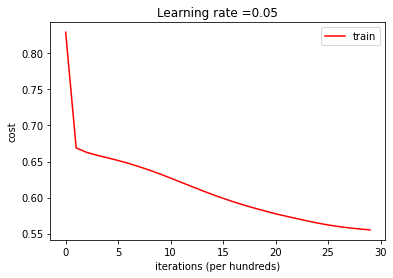

In [ ]:
parameters, fig = L_layer_model(X, Y, layer_dims, learning_rate=lr, num_iterations=num_iterations, print_cost=True, visualize=True)

In [ ]:
predictions = predict(X, parameters, L_model_forward)
print(f"Accuracy: {compute_accuracy(predictions, Y) * 100:.2f}%")

Accuracy: 77.50%


The following graphic is interactive, fiddle with the slider and check how the model learns!

Each axis represents an input value, the dots are our training data and the heatmap below represents the prediction that the model is giving for each input pair on a given iteration.

In [ ]:
fig.show()

## Cat Dataset

**Problem Statement**: You are given a dataset ("data.h5") containing:

- A training set of m_train images labelled as cat (1) or non-cat (0)
- A test set of m_test images labelled as cat and non-cat
- Each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB).

How would you make a model that classifies images?

Let's get more familiar with the dataset. Load the data by running the cell below.

In [ ]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_cat_dataset()

The following code will show you an image in the dataset. Feel free to change the index and re-run the cell multiple times to see other images.

y = 0. It's a non-cat picture.


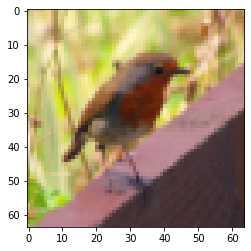

In [ ]:
# Example of a picture
index = 10
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [ ]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In order to feed images to a neural network, you will need to reshape and standardize them. The code is given in the cell below.

![picture](https://drive.google.com/uc?export=view&id=1_9SM1exUuytZ4XxMQ8v3xIMqpnhidE9D)

In [ ]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


### Image classifier

Now that you are familiar with the dataset, it is time to build a deep neural network to distinguish cat images from non-cat images.

![picture](https://drive.google.com/uc?export=view&id=1Pc13Gnec_7J3M_ugg0W6CoYP6YyhfEPX)

Detailed Architecture of the figure above:

 - The input is a (64, 64, 3) image which is flattened to a vector of size (12288, 1).
 - The corresponding vector: $[x_0,x_1,\ldots,x_{12287}]^T$ is then multiplied by the weight matrix $W^{[1]}$ and then you add the intercept $b^{[1]}$. The result is called the linear unit.
 - Next, you take the relu of the linear unit. This process could be repeated several times for each $(W^{[l]}, b^{[l]})$ depending on the model architecture.
 - Finally, you take the sigmoid of the final linear unit. If it is greater than 0.5, you classify it to be a cat.

**EXERCISE**: Train an MLP with the size of your choice and assign its parameters to a variable named `parameters`. Experiment with the size and number of layers (as well as hyperparameters) and try to get a model that achieves more than 75\% accuracy on the test split.

**NOTE:** as the input features are 12288 (more than 2, in any case), do not use `visualize=True` when calling to `L_layer_model()` function. Visualization is only possible for less than 2 features in the input layer.

You can find some tips below the code.

Cost after iteration 0: 0.695294
Cost after iteration 100: 0.637988
Cost after iteration 200: 0.555114
Cost after iteration 300: 0.629852
Cost after iteration 400: 0.453075
Cost after iteration 500: 0.292848
Cost after iteration 600: 0.254230
Cost after iteration 700: 0.174915
Cost after iteration 800: 0.104438
Cost after iteration 900: 0.085806


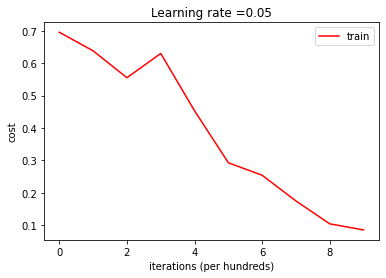

In [ ]:
# Create and train your model
### START CODE HERE ### (≈ 2 lines)
#layer_dims = [2, 5, 1] #  2-layer model | lr = 0.05 | num_iterations = 3000
layer_dims = [12288,128,4,1]
parameters = L_layer_model(train_x, train_y, layer_dims, learning_rate=0.05, num_iterations=1000, print_cost=True, visualize=False)
### END CODE HERE ###

In [ ]:
pred_train = predict(train_x, parameters, L_model_forward)
print(f"Train Accuracy: {compute_accuracy(pred_train, train_y) * 100:.0f}%")

pred_test = predict(test_x, parameters, L_model_forward)
print(f"Test Accuracy: {compute_accuracy(pred_test, test_y) * 100:.0f}%")

Train Accuracy: 99%
Test Accuracy: 74%


**Tips**: 

* Try not to learn the training split too much! Learning rate and the number of iterations are key for that.

* If a chosen learning rate is too high, it will probably diverge or not learn at all. This can be seen in the cost value during training, where it will diverge or converge in a high value (in this excercise, this value will be greater than 0.5 when it doesn't converge correctly).

![picture](https://drive.google.com/uc?export=view&id=1VqUYPaepF2lFdhadNQgroujaEm7oOrgD)

* If a chosen learning rate is too low, it will take a while to converge, but end up learning the training split too well. 

* The example below shows the behaviour of an adequate learning-rate.

![picture](https://drive.google.com/uc?export=view&id=14eJh-ynS4cqwkSR7FA9PPx7fsFJLNd0a)

### Results analysis

First, let's take a look at some images the L-layer model labeled incorrectly. This will show a few mislabeled images.

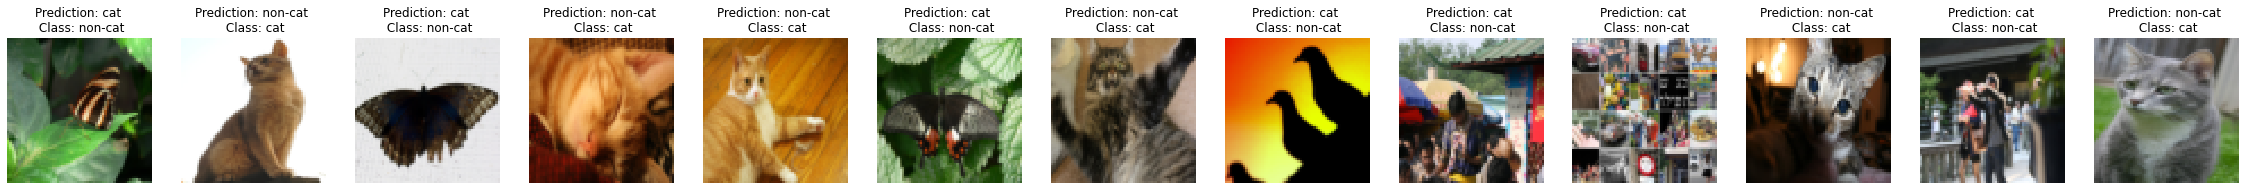

In [ ]:
print_mislabeled_images(classes, test_x, test_y, pred_test)


A few types of images the model tends to do poorly on include:

* Cat body in an unusual position
* Cat appears against a background of a similar color
* Unusual cat color and species
* Camera Angle
* Brightness of the picture
* Scale variation (cat is very large or small in image)

